In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

wd = "projects/empathi"

In [30]:
general = ["packaging_assembly", "pvp", "nucleotide_metabolism", "RNA-associated", "DNA-associated", "lysis", 
                  "cell_wall_depolymerase", "super_infection", "toxin", "anti-restriction", "crispr", 
                  "sir2", "transferase", "reductase", "adsorption-related", "phosphorylation", "ejection", 
                  "transcriptional_regulator"]
pvp = ["capsid", "tail", "portal", "head-tail_joining", "collar"]
capsid = ["major_capsid", "minor_capsid"]
tail = ["major_tail", "minor_tail", "baseplate", "tail_appendage", "tail_sheath"]
lysis = ["endolysin", "lysis_inhibitor", "holin", "spanin"]
regulator = ["transcriptional_activator", "transcriptional_repressor"]
dna = ["integration", "nuclease","DNA_polymerase", "terminase","annealing","helicase", "primase", "replication_initiation"]

In [43]:
preds = pd.read_csv(os.path.join(wd, "envhog/predictions_envhog.csv"), index_col=0)

In [46]:
print("Proportion of dataset that recieved a prediction:", ((preds.loc[:,general] > 0.5).sum(axis=1) >= 1).sum() / len(preds))

Proportion of dataset that recieved a prediction: 0.6750446899798075


##### Protein counts at 95% conf

In [45]:
print("Proportion of dataset that recieved a prediction:", ((preds.loc[:,general] > 0.95).sum(axis=1) >= 1).sum() / len(preds))

Proportion of dataset that recieved a prediction: 0.33026517185791326


In [32]:
preds = preds.loc[((preds.loc[:, general] > 0.95).sum(axis=1) > 0)] 
#select only entries where general category has confidence >95%

In [33]:
counts = (preds.loc[:, general] > 0.95).sum()
for j,k in zip(["pvp", "lysis", "transcriptional_regulator", "DNA-associated"],[pvp, lysis, regulator, dna]):
    for i in k:
        tmp = preds.loc[preds[j] > 0.95]
        counts[i] = (tmp[i] > 0.95).sum()
        
for j,k in zip(["tail","capsid"],[tail, capsid]):
    for i in k:
        tmp = preds.loc[(preds.pvp > 0.95) & (preds[j] > 0.95)]
        counts[i] = (tmp[i] > 0.95).sum()

counts.sort_values(ascending=False)

pvp                          352627
DNA-associated               270539
tail                         247064
tail_appendage                72006
transcriptional_regulator     56572
packaging_assembly            41767
nuclease                      35173
transcriptional_repressor     28512
lysis                         27032
transferase                   25159
minor_tail                    21986
cell_wall_depolymerase        18457
integration                   18368
terminase                     17843
adsorption-related            14097
holin                         11645
anti-restriction              10909
head-tail_joining              9312
endolysin                      8775
capsid                         8499
baseplate                      7718
RNA-associated                 6188
portal                         5276
major_tail                     4884
replication_initiation         4809
major_capsid                   4538
helicase                       4222
spanin                      

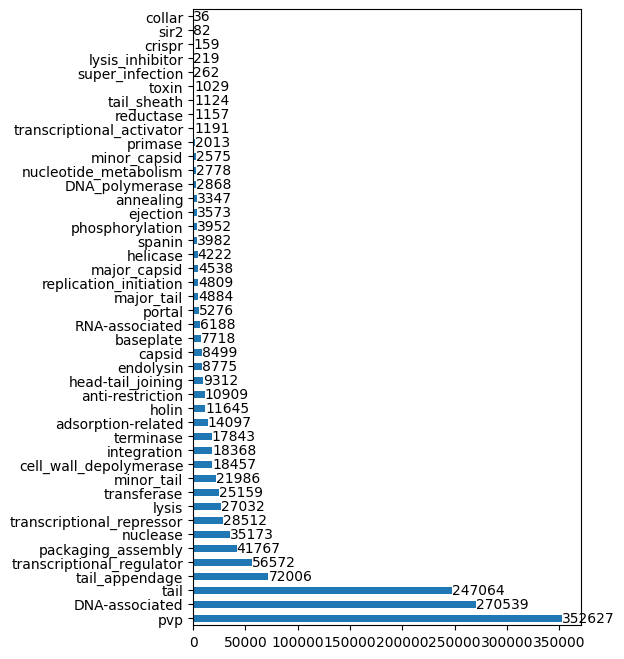

In [34]:
counts = counts.sort_values(ascending=False)
bars = counts.plot.barh(figsize=(5,8))
bars.bar_label(bars.containers[0])
plt.show()